In [1]:
#Import and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 120)

MERGED_MODELING_CSV = "../data/processed/SDR_676_all_converted.csv" 

In [2]:
df = pd.read_csv(MERGED_MODELING_CSV, low_memory=False)

print("Shape:", df.shape)
df.head(3)

Shape: (14324, 77)


,SubmitterDesignator,RegistryNNumber,ComponentMake,PropellerMake,ButtlineToSide,WingStationToSide,ComponentTotalCycles,PartCondition,PartSinceCode,SourceFile,...,NatureOfConditionC,EngineTotalTime,AircraftModel,OperatorDesignator,StageOfOperationCode,NumberOfCracks,PartTotalTime,PropellerTotalTime,PrecautionaryProcedureB,ComponentPartNumber
0,ABXA,650GT,NaN,NaN,NaN,NaN,NaN,FALSE ACTIVATION,NaN,SDR_676_202201.xls,...,NaN,NaN,767231,ABXA,TX,NaN,NaN,NaN,NaN,NaN
1,ABXA,749AX,NaN,NaN,NaN,NaN,NaN,NONE,NaN,SDR_676_202201.xls,...,NaN,NaN,767232,ABXA,TX,NaN,NaN,NaN,NaN,NaN
2,CALA,685UA,NaN,NaN,NaN,NaN,NaN,FALSE INDICATION,NaN,SDR_676_202201.xls,...,NaN,NaN,767300,CALA,UK,NaN,NaN,NaN,NaN,NaN


In [3]:
df = pd.read_csv(MERGED_MODELING_CSV, low_memory=False)

print("Shape:", df.shape)
df.head(3)

Shape: (14324, 77)


,SubmitterDesignator,RegistryNNumber,ComponentMake,PropellerMake,ButtlineToSide,WingStationToSide,ComponentTotalCycles,PartCondition,PartSinceCode,SourceFile,...,NatureOfConditionC,EngineTotalTime,AircraftModel,OperatorDesignator,StageOfOperationCode,NumberOfCracks,PartTotalTime,PropellerTotalTime,PrecautionaryProcedureB,ComponentPartNumber
0,ABXA,650GT,NaN,NaN,NaN,NaN,NaN,FALSE ACTIVATION,NaN,SDR_676_202201.xls,...,NaN,NaN,767231,ABXA,TX,NaN,NaN,NaN,NaN,NaN
1,ABXA,749AX,NaN,NaN,NaN,NaN,NaN,NONE,NaN,SDR_676_202201.xls,...,NaN,NaN,767232,ABXA,TX,NaN,NaN,NaN,NaN,NaN
2,CALA,685UA,NaN,NaN,NaN,NaN,NaN,FALSE INDICATION,NaN,SDR_676_202201.xls,...,NaN,NaN,767300,CALA,UK,NaN,NaN,NaN,NaN,NaN


In [4]:
needed = ["OperatorControlNumber","DifficultyDate","AircraftMake","AircraftModel","JASCCode","Discrepancy","SourceFile"]
missing = [c for c in needed if c not in df.columns]
print("Missing expected columns:", missing)

# parse date
df["DifficultyDate"] = pd.to_datetime(df["DifficultyDate"], errors="coerce")

print("Date range:", df["DifficultyDate"].min(), "→", df["DifficultyDate"].max())
print("Unique IDs:", df["OperatorControlNumber"].nunique(), " / rows:", len(df))

Missing expected columns: []
Date range: 2022-01-01 00:00:00 → 2025-09-30 00:00:00
Unique IDs: 14324  / rows: 14324


In [5]:
#missingn value and duplicate
missing_value = df[needed].isna().mean().sort_values(ascending=False)
missing_value

OperatorControlNumber    0.0
DifficultyDate           0.0
AircraftMake             0.0
AircraftModel            0.0
JASCCode                 0.0
Discrepancy              0.0
SourceFile               0.0
dtype: float64

In [6]:
#Check duplicates by ID (should be 0 as we expect one row per record as we has been query and checking through mergeing
dupe_counts = df["OperatorControlNumber"].value_counts()
dupes = dupe_counts[dupe_counts > 1]
print("Duplicates by ID:", int((dupe_counts > 1).sum()))
if len(dupes):
    display(df[df["OperatorControlNumber"].isin(dupes.index)].sort_values("OperatorControlNumber").head(10))

Duplicates by ID: 0


Completely empty discrepancy rows: 0
count    14324.000000
mean       235.159732
std        201.261496
min          8.000000
25%        133.750000
50%        186.000000
75%        273.000000
max       4483.000000
Name: len_char, dtype: float64
count    14324.000000
mean        38.434446
std         32.376858
min          2.000000
25%         22.000000
50%         30.000000
75%         45.000000
max        695.000000
Name: len_word, dtype: float64


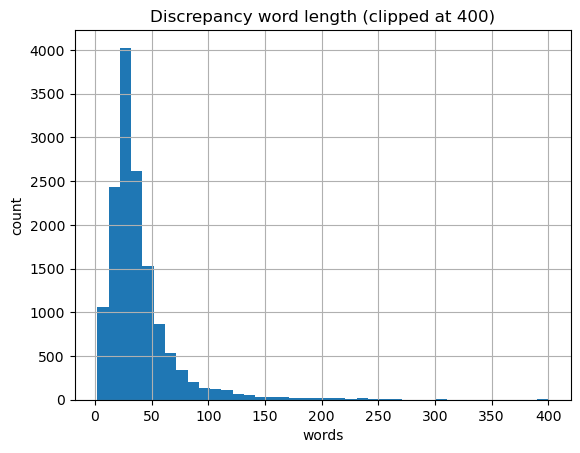

In [7]:
# Checking discrepancy fortext length (characters & approx words)
df["disc"] = df["Discrepancy"].astype(str).str.strip()
df["len_char"] = df["disc"].str.len()# Cell 6: detect empty/boilerplate-looking rows
blank_rows = (df["disc"].str.len() == 0).sum()
print("Completely empty discrepancy rows:", blank_rows)

# % uppercase heuristic (just for curiosity)
def upper_ratio(s: str) -> float:
    s2 = "".join([ch for ch in s if ch.isalpha()])
    return (sum(ch.isupper() for ch in s2) / max(1, len(s2))) if s2 else 0.0

sample = df["disc"].sample(min(2000, len(df)), random_state=42)
approx_upper = sample.apply(upper_ratio).mean()
approx_upper

df["len_word"] = df["disc"].str.split().apply(len)

print(df["len_char"].describe())
print(df["len_word"].describe())

# quick histogram (matplotlib will choose default colors)
df["len_word"].clip(0, 400).hist(bins=40)
plt.title("Discrepancy word length (clipped at 400)")
plt.xlabel("words")
plt.ylabel("count")
plt.show()


In [8]:
# Cell 6: detect empty/boilerplate-looking rows
blank_rows = (df["disc"].str.len() == 0).sum()
print("Completely empty discrepancy rows:", blank_rows)

# % uppercase heuristic (just for curiosity)
def upper_ratio(s: str) -> float:
    s2 = "".join([ch for ch in s if ch.isalpha()])
    return (sum(ch.isupper() for ch in s2) / max(1, len(s2))) if s2 else 0.0

sample = df["disc"].sample(min(2000, len(df)), random_state=42)
approx_upper = sample.apply(upper_ratio).mean()
approx_upper


Completely empty discrepancy rows: 0


np.float64(1.0)

In [9]:
# Cell 7: normalize JASC to int (when possible)
def as_int_or_nan(x):
    try:
        return int(float(x))
    except Exception:
        return np.nan

df["JASC_int"] = df["JASCCode"].apply(as_int_or_nan)
#cretae chapter for JASC for category labels
top_jasc = df["JASC_int"].value_counts(dropna=True).head(25)
print(top_jasc)
# simple JASC chapter (e.g., 2421 → 24xx)
df["JASC_chapter"] = (df["JASC_int"] // 100) * 100
chapter_counts = df["JASC_chapter"].value_counts(dropna=True).sort_index()
chapter_counts.tail(20)

JASC_int
3350    1147
5321    1089
5320     703
5330     539
5270     535
5300     493
5313     424
5210     390
2560     339
5310     321
5754     308
5753     307
5322     217
5311     212
5730     204
5400     192
5410     192
5700     188
5100     178
5710     177
2565     163
5720     152
7200     139
5347     137
2150     132
Name: count, dtype: int64


JASC_chapter
3800      23
4900     275
5100     193
5200    1227
5300    4442
5400     658
5500     324
5600     123
5700    1593
7100     103
7200     244
7300     131
7400      48
7500      93
7600       9
7700      53
7800     146
7900      29
8000      66
8300       2
Name: count, dtype: int64

In [10]:
# Cell 9: mapping function (tweak if you like)
def jasc_to_category(code):
    try:
        c = int(float(code))
    except:
        return "OTHER"

    if 2100 <= c <= 2199: return "ENVIRONMENTAL"     # 21
    if 2200 <= c <= 2299: return "AUTOFLIGHT/INSTR"  # 22
    if 2300 <= c <= 2399: return "COMM/NAV"          # 23
    if 2400 <= c <= 2499: return "ELECTRICAL"        # 24
    if 2500 <= c <= 2599: return "INTERIOR/CABIN"    # 25
    if 2600 <= c <= 2699: return "FIRE_PROTECTION"   # 26
    if 2700 <= c <= 2799: return "FLIGHT_CONTROLS"   # 27
    if 2800 <= c <= 2899: return "FUEL"              # 28
    if 2900 <= c <= 2999: return "HYDRAULIC"         # 29
    if 3000 <= c <= 3499: return "INSTRUMENTS/AVIONICS"  # 30–34
    if 3500 <= c <= 3599: return "OXYGEN"            # 35
    if 3600 <= c <= 3699: return "PNEUMATIC"         # 36
    if 3800 <= c <= 3899: return "WATER/WASTE"       # 38
    if 4900 <= c <= 5499: return "STRUCTURES"        # 49–54
    if 5500 <= c <= 5799: return "STRUCTURES"        # 55–57  (doors, empennage, wings)
    if 7000 <= c <= 8999: return "POWERPLANT"        # 70–89
    if c == 1100: return "PLACARDS/MARKINGS" # olny 5 case for now/ will merge into 
    return "OTHER"

df["Category"] = df["JASCCode"].apply(jasc_to_category)

cat_counts = df["Category"].value_counts()
cat_counts

Category
STRUCTURES              8835
INSTRUMENTS/AVIONICS    1974
POWERPLANT               924
INTERIOR/CABIN           661
ENVIRONMENTAL            424
FLIGHT_CONTROLS          382
FUEL                     266
HYDRAULIC                177
PNEUMATIC                154
ELECTRICAL               136
FIRE_PROTECTION          125
COMM/NAV                  89
OXYGEN                    87
AUTOFLIGHT/INSTR          62
WATER/WASTE               23
PLACARDS/MARKINGS          5
Name: count, dtype: int64

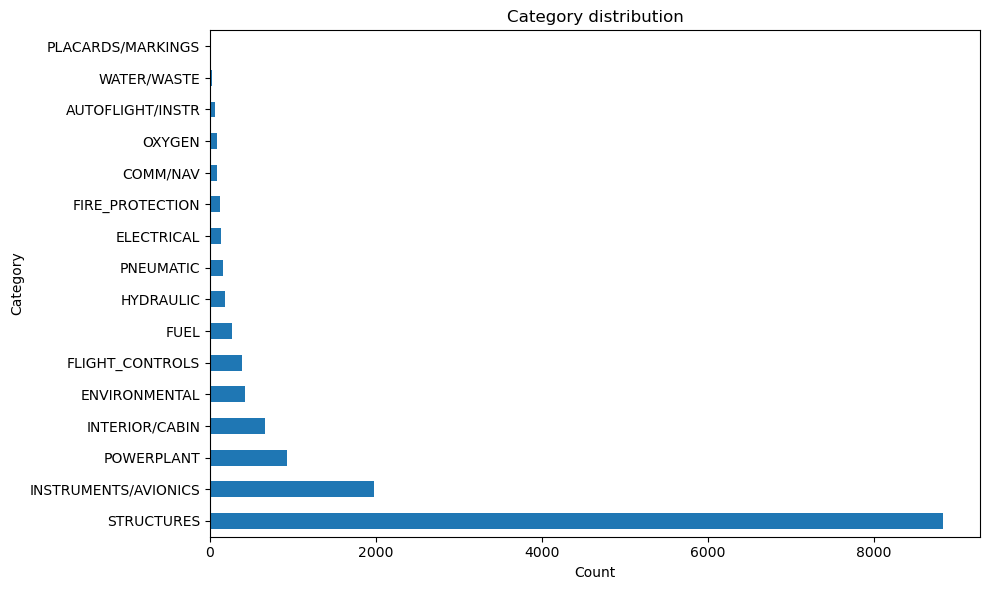

In [11]:
# Cell 10: visualize category distribution
ax = cat_counts.plot(kind="barh", figsize=(10,6))
ax.set_title("Category distribution")
ax.set_xlabel("Count")
ax.set_ylabel("Category")
plt.tight_layout()
plt.show()


In [12]:
#This used to inspect OTHER catergory and look through documents to classify them again
# Filter rows labeled OTHER
#other_df = df[df["Category"] == "OTHER"]
#print("OTHER count:", len(other_df))
#print("Unique JASC codes inside OTHER:", other_df["JASCCode"].nunique())
# Show top 30 most frequent JASC codes that landed in OTHER
#print(other_df["JASCCode"].value_counts().head(30))

We can see that we have:

    - Big group(greater than 500 samples): STRUCTURES, INSTRUMENTS/AVIONICS, POWERPLANT, INTERIOR/CABIN 
    - Medium Group(200-500 samples): ENVIRONMENTAL, FLIGHT_CONTROLS, FUEL
    - Small group ( less than 200 samples) are the rest
The small group with less than 200 samples can be hard for BERD to learn - >  consider megering with other category for now. We will comeback in future as we query and get more records from FAA website.

New Category:
- AVIONICS/ELECTRICAL(2260) = merge INSTRUMENTS/AVIONICS (1974) + ELECTRICAL (136) + COMM/NAV (89) + AUTOFLIGHT/INSTR (62)
- FLUID_SYSTEMS (600) = FUEL (266) + HYDRAULIC (177) + PNEUMATIC (154)
- ENVIRONMENTAL/SAFETY (~660) = ENVIRONMENTAL (424) + FIRE_PROTECTION (125) + OXYGEN (87) + WATER/WASTE (23)

Category_adj
STRUCTURES              8835
AVIONICS/ELECTRICAL     2261
POWERPLANT               924
CABIN                    666
ENVIRONMENTAL/SAFETY     659
FLUID_SYSTEMS            597
FLIGHT_CONTROLS          382
Name: count, dtype: int64


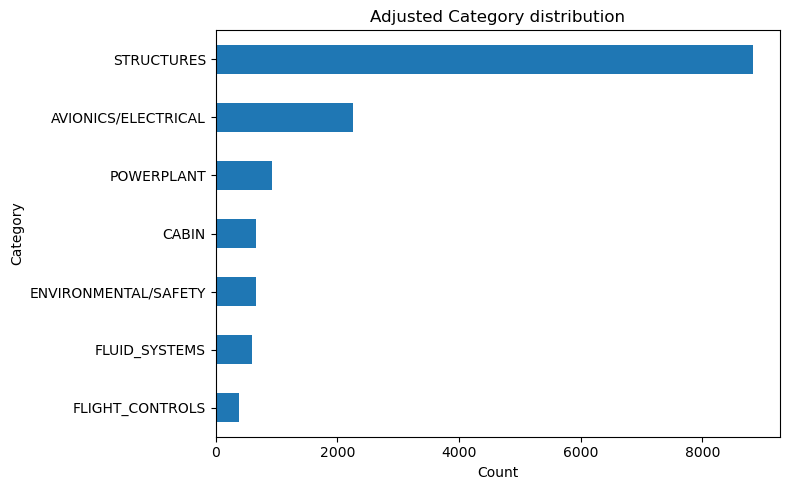

In [13]:
def merge_category(cat: str) -> str:
    if cat == "":
        return "CABIN"   # or "OTHER", depending on your decision
    if cat in ["INSTRUMENTS/AVIONICS", "ELECTRICAL", "COMM/NAV", "AUTOFLIGHT/INSTR"]:
        return "AVIONICS/ELECTRICAL"
    if cat in ["FUEL", "HYDRAULIC", "PNEUMATIC"]:
        return "FLUID_SYSTEMS"
    if cat in ["ENVIRONMENTAL", "FIRE_PROTECTION", "OXYGEN", "WATER/WASTE"]:
        return "ENVIRONMENTAL/SAFETY"
    if cat in ["INTERIOR/CABIN","PLACARDS/MARKINGS"]:   #for now PLACARDS/MARKINGS with be
        return "CABIN"
    if cat in ["FLIGHT_CONTROLS"]:
        return "FLIGHT_CONTROLS"
    if cat in ["POWERPLANT"]:
        return "POWERPLANT"
    if cat in ["STRUCTURES"]:
        return "STRUCTURES"
    return "OTHER"

# 2) Create adjusted label
df["Category_adj"] = df["Category"].apply(merge_category)

# 3) Inspect new distribution
counts = df["Category_adj"].value_counts().sort_values(ascending=False)
print(counts)

# (Optional) Horizontal bar chart, sorted
import matplotlib.pyplot as plt
counts.sort_values().plot(kind="barh", figsize=(8,5))
plt.title("Adjusted Category distribution")
plt.xlabel("Count"); plt.ylabel("Category")
plt.tight_layout(); plt.show()


In [14]:
monthly = (df
           .assign(month=df["DifficultyDate"].dt.to_period("M"))
           .groupby("month").size())
monthly.tail(15)

month
2024-07    298
2024-08    403
2024-09    290
2024-10    489
2024-11    322
2024-12    193
2025-01     13
2025-02    237
2025-03    510
2025-04    277
2025-05    327
2025-06    286
2025-07    313
2025-08    345
2025-09    240
Freq: M, dtype: int64

In [15]:
df["AircraftModel"].value_counts().head(10)

AircraftModel
767332      2631
767323      1483
76734AF     1340
767322      1083
7673S2F     1019
767300       937
767432ER     790
767338       364
767          344
767424ER     295
Name: count, dtype: int64

In [16]:
model_cols = ["OperatorControlNumber","DifficultyDate","AircraftMake","AircraftModel",
              "JASCCode","Discrepancy","SourceFile","Category","JASC_int","Category_adj"]

#model_cols = ["OperatorControlNumber","DifficultyDate","AircraftMake","AircraftModel",
#              "JASCCode","Discrepancy","SourceFile","Category","Category_adj","JASC_int","JASC_chapter"]

model_df = df[model_cols].copy()
model_df = model_df.sort_values("DifficultyDate")

out_path = "../data/processed/sdr_training.csv"
model_df.to_csv(out_path, index=False)
print("Saved:", out_path, "rows:", len(model_df))

Saved: ../data/processed/sdr_training.csv rows: 14324
